## ML Classification : Bank term deposit

Dataset : https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2024/03-classification/homework.md

## Data Preparation

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/machine-learning-zoomcamp/blob/master/cohorts/2024/03-classification/homework.md'

!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

--2024-10-14 13:30:06--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [   <=>              ] 999.85K  2.00MB/s    in 0.5s    

2024-10-14 13:30:07 (2.00 MB/s) - ‘bank+marketing.zip’ saved [1023843]



In [3]:
import zipfile

# Unzip the file
with zipfile.ZipFile('bank+marketing.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
# Unzip the file
with zipfile.ZipFile('bank.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv('bank-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.head().T #transposing the data frame to see all the columns

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


### Question 1

In [6]:
columns = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 
           'pdays', 'previous', 'poutcome', 'y']

len(columns)

15

In [7]:
df = df[columns]
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5
month,may,may,may,may,may
duration,261,151,76,92,198


In [8]:
df.isnull().sum() #checking for missing values

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Question 1 answer: the most frequent observation (mode) for education is 'secondary'

In [10]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [11]:
df.y = (df.y == 'yes').astype(int)
df.y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

### Setting up the validation framework

- Perform the train/validation/test split with Scikit-Learn

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Split the original dataframe 'df' into two parts: 
# 'df_full_train' (80% of the data) and 'df_test' (20% of the data)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Further split 'df_full_train' into 'df_train' (75% of df_full_train) 
# and 'df_val' (25% of df_full_train)
# This means 'df_train' is 60% of the original data and 'df_val' is 20% of the original data
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [14]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

## EDA

- Check missing values
- Look at the target variable
- Look at numerical and categorical variables

In [17]:
df_full_train = df_full_train.reset_index(drop=True)

In [18]:
df_full_train.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [19]:
df_full_train.y.value_counts(normalize=True)

y
0    0.883931
1    0.116069
Name: proportion, dtype: float64

Contact rate is 11.72% 

In [20]:
global_contact_rate = df_full_train.y.mean()
round(global_contact_rate, 2)

np.float64(0.12)

In [21]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [22]:
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [23]:
df_full_train[categorical].nunique()

job          12
marital       3
education     4
housing       2
contact       3
month        12
poutcome      4
dtype: int64

### Question 2: Feature importance - Correlation

How about numerical columns?

- Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [24]:
import seaborn as sns

In [25]:
# Assuming df_train is your training DataFrame
correlation_matrix = df_full_train[numerical].corr()

print(correlation_matrix)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.098921 -0.007882 -0.007414  0.003160 -0.023231  0.002397
balance   0.098921  1.000000  0.000455  0.025590 -0.018566  0.002122  0.015291
day      -0.007882  0.000455  1.000000 -0.025719  0.160599 -0.094405 -0.053229
duration -0.007414  0.025590 -0.025719  1.000000 -0.086526 -0.001179  0.002557
campaign  0.003160 -0.018566  0.160599 -0.086526  1.000000 -0.089317 -0.033300
pdays    -0.023231  0.002122 -0.094405 -0.001179 -0.089317  1.000000  0.440662
previous  0.002397  0.015291 -0.053229  0.002557 -0.033300  0.440662  1.000000


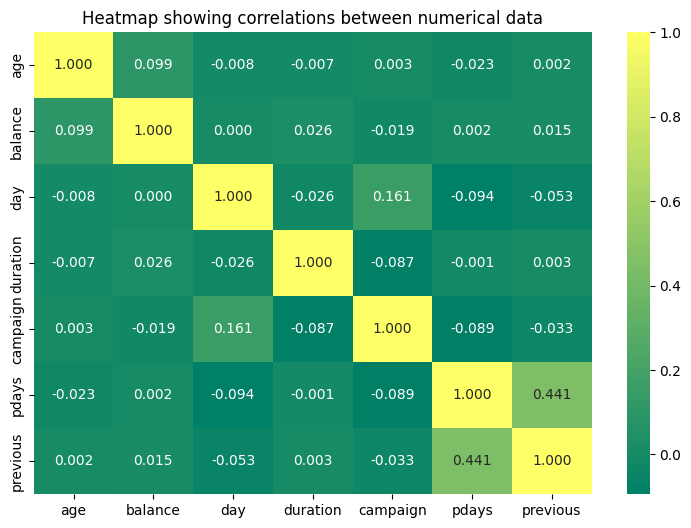

In [26]:
plt.figure(figsize=(9, 6))
sns.heatmap(df_full_train[numerical].corr(), cmap="summer", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between numerical data')
plt.show();

In [27]:
# Get the correlation values and find the maximum
max_corr = correlation_matrix.unstack().sort_values(ascending=False)

# Remove self correlation
max_corr = max_corr[max_corr < 1]
top_features = max_corr.idxmax()
print(f"Question 2 answer: The two features with the highest correlation are: {top_features}")

Question 2 answer: The two features with the highest correlation are: ('pdays', 'previous')


### Question 3: Feature importance - Mutual information score

In [28]:
from sklearn.metrics import mutual_info_score

In [29]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.y)

In [30]:
# Calculate mutual information scores for each categorical feature with respect to churn
mi = df_full_train[categorical].apply(mutual_info_churn_score)

# Sort the mutual information scores in descending order
mi.sort_values(ascending=False).to_frame(name='MIScore')

,MIScore
poutcome,0.029257
month,0.024774
contact,0.014164
housing,0.009800
job,0.007765
education,0.002458
marital,0.002019


Question 3 answer: `poutcome` has the biggest information score

### One-hot encoding
Use Scikit-Learn to encode categorical features

In [31]:
from sklearn.feature_extraction import DictVectorizer

In [32]:
#Initialize an instance of the DictVectorizer class
dv = DictVectorizer(sparse=False)

In [33]:
# Convert the training data to a dictionary format and then transform it into a feature matrix
# Using fit_transform on the training data to learn the encoding and transform the data in one step
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

# Convert the validation data to a dictionary format and then transform it into a feature matrix
# Using transform on the validation data to apply the same encoding learned from the training data
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [34]:
X_train[0]  

array([ 41., 676.,   1.,   0.,   0.,   1.,  17.,  78.,   0.,   0.,   1.,
         0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,  -1.,   0.,   0.,
         0.,   1.,   0.])

### Question 4: Training logistic regression with Scikit-Learn
* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [35]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [36]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [37]:
#For the probability
#This is a 2 dimensional array where the first column is the probability of 
# the negative class (0) and the second column is the probability of the positive class (1)  
# So we are interested in the second column probability of churn 
model.predict_proba(X_train)

array([[0.9685195 , 0.0314805 ],
       [0.43897021, 0.56102979],
       [0.57235274, 0.42764726],
       ...,
       [0.98185983, 0.01814017],
       [0.95436058, 0.04563942],
       [0.97630487, 0.02369513]])

In [38]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred_proba = model.predict_proba(X_val)

# Convert probabilities to class labels (assuming binary classification)
y_pred = (y_pred_proba[:, 1] >= 0.5).astype(int)

# Calculate accuracy
accuracy = np.round(accuracy_score(y_val, y_pred), 5)
print(f'Accuracy = {accuracy}')

Accuracy = 0.90223


In [39]:
# y_pred = model.predict_proba(X_val)[:, 1]
# contact_decision = (y_pred >= 0.5)
# (y_val == contact_decision).mean()

# # Create a new DataFrame to store the predictions
# df_pred = pd.DataFrame()

# # Add the predicted probabilities of churn to the DataFrame
# df_pred['probability'] = y_pred

# # Add the binary predictions (0 or 1) to the DataFrame
# df_pred['prediction'] = contact_decision.astype(int)

# # Add the actual churn values to the DataFrame
# df_pred['actual'] = y_val
# df_pred['correct'] = df_pred.prediction == df_pred.actual
# df_pred

In [40]:
# # Calculate the proportion of correct predictions
# accuracy = df_pred.correct.mean()
# accuracy

### Question 5: feature elimination technique

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

In [41]:
features = df_train.columns.to_list()
features

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [42]:
# Store the original accuracy score
original_score = accuracy

# Create an empty DataFrame to store the results
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])

# Iterate over each feature to eliminate it and evaluate the model
for feature in features:
    # Create a subset of features excluding the current feature
    subset = features.copy()
    subset.remove(feature)
    
    # Convert the training data to a dictionary format and then transform it into a feature matrix
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    # Train the logistic regression model on the subset of features
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    # Convert the validation data to a dictionary format and then transform it into a feature matrix
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    # Predict the target variable for the validation set
    y_pred = model.predict(X_val)
    
    # Calculate the accuracy score for the model without the current feature
    score = accuracy_score(y_val, y_pred)
    
    # Record the eliminated feature, the new accuracy, and the difference from the original accuracy
    scores.loc[len(scores)] = [feature, score, abs(original_score - score)]

In [43]:
scores

,eliminated_feature,accuracy,difference
0,age,0.901460,0.000770
1,job,0.902123,0.000107
2,marital,0.901681,0.000549
3,education,0.902455,0.000225
4,balance,0.902123,0.000107
5,housing,0.902787,0.000557
6,contact,0.901239,0.000991
7,day,0.902013,0.000217
8,month,0.899027,0.003203
9,duration,0.890843,0.011387


In [44]:
# Store the original accuracy score
original_score = accuracy

# Create an empty DataFrame to store the results
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])

# Iterate over each feature to eliminate it and evaluate the model
for feature in features:
    # Create a subset of features excluding the current feature
    subset = features.copy()
    subset.remove(feature)
    
    # Convert the training data to a dictionary format and then transform it into a feature matrix
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    # Train the logistic regression model on the subset of features
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    # Convert the validation data to a dictionary format and then transform it into a feature matrix
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    # Predict the target variable for the validation set
    y_pred = model.predict(X_val)
    
    # Calculate the accuracy score for the model without the current feature
    contact_decision = (y_pred >= 0.5)
    score = (y_val == contact_decision).mean()
    
    # Record the eliminated feature, the new accuracy, and the difference from the original accuracy
    scores.loc[len(scores)] = [feature, score, abs(original_score - score)]

scores

,eliminated_feature,accuracy,difference
0,age,0.901460,0.000770
1,job,0.902123,0.000107
2,marital,0.901681,0.000549
3,education,0.902455,0.000225
4,balance,0.902123,0.000107
5,housing,0.902787,0.000557
6,contact,0.901239,0.000991
7,day,0.902013,0.000217
8,month,0.899027,0.003203
9,duration,0.890843,0.011387


In [45]:
# Find the minimum difference in accuracy when a feature is eliminated
min_diff = scores.difference.min()

# Filter the scores DataFrame to find the feature(s) with the minimum difference
# This will show the feature(s) whose elimination has the least impact on the model's accuracy
min_diff_features = scores[scores.difference == min_diff]

# Check if the features are within the expected values
expected_features = ['age', 'balance', 'marital', 'previous']
result = min_diff_features[min_diff_features.eliminated_feature.isin(expected_features)]
result

,eliminated_feature,accuracy,difference
4,balance,0.902123,0.000107


### Question 6: regularized logistic regression
* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

In [61]:
scores = {}
for c in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(penalty='l2', C=c, solver='liblinear', max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = accuracy_score(y_val, y_pred)
    scores[c] = round(score, 3)
    print(f'C = {c}:\t Accuracy = {score}')

max_score = max(scores.values())
best_c = max(scores, key=scores.get)
print(f'Maximum Accuracy = {max_score} with C = {best_c}')

C = 0.01:	 Accuracy = 0.8920592789205928
C = 0.1:	 Accuracy = 0.8971466489714665
C = 1:	 Accuracy = 0.8973678389736784
C = 10:	 Accuracy = 0.8973678389736784
C = 100:	 Accuracy = 0.8972572439725724
Maximum Accuracy = 0.897 with C = 0.1
